**IMPORTING THE LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**IMPORTING DATASET**

In [ ]:
dataset=pd.read_csv("/content/Iris.csv")
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


The dataset consists of columns with names including Id,SepalLengthcm,SepalWidthcm,PetalLengthcm,PetalWidthcm,Species of 6 columns 

**SHAPE OF THE DATASET**

In [ ]:
dataset.shape

(150, 6)

After a brief examination of the dataset,we can clearly say that the Id is not required for us to determine the species of a iris flower.

**CLEANING OF THE DATASET**

In [ ]:
dataset.drop(columns=["Id"],inplace=True)
dataset.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


After removing the id the shape of the dataset as follows

In [ ]:
dataset.shape

(150, 5)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The datatype of every column is almost i.e; float but the datatype of the Species column is different which is an object datatype.

 Check for duplicates if any present in dataset.

In [ ]:
duplisum=dataset.duplicated().sum()
duplisum

3

 There are 3 duplicates present in datset.

In [ ]:
dup=dataset.duplicated()
dataset[dup]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


As there are lesser number of duplicates those 3 can be dropped amnully by using drop method

In [ ]:
dataset.drop_duplicates(inplace=True)

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
dataset.shape

(147, 5)

Checking the shape after reducing the duplicates.

**DATA VISUALIZATION**

In [ ]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


A clear analysis of data is represented above for every column with stastical measures like mean,median,standard deviation respectively.

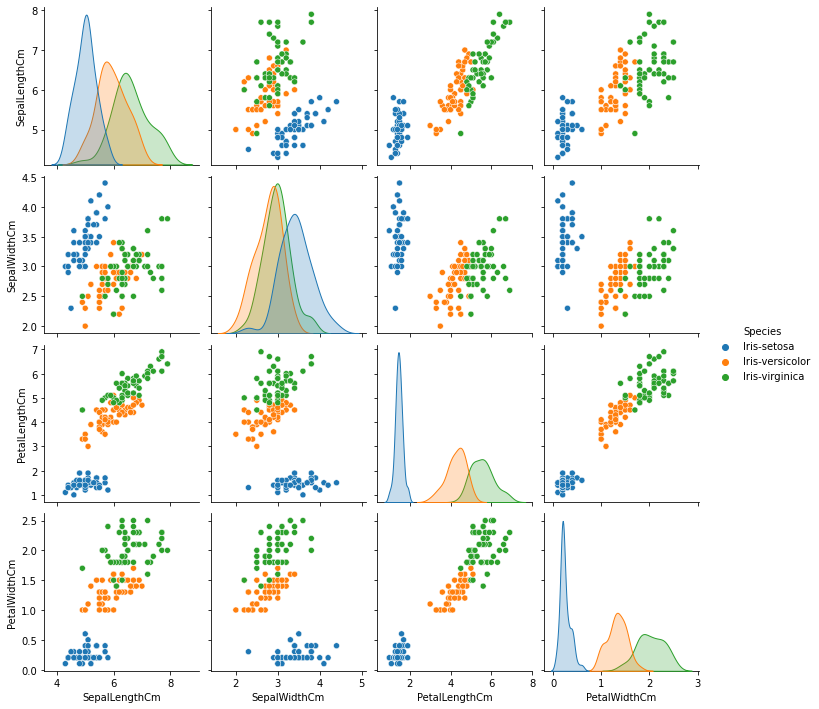

In [ ]:
sns.pairplot(dataset,hue="Species")

From the above pair plots we can say that there are 3 Species in iris dataset.The names of the Species are Iris-setosa,Iris-versicolor and Iris-virginica

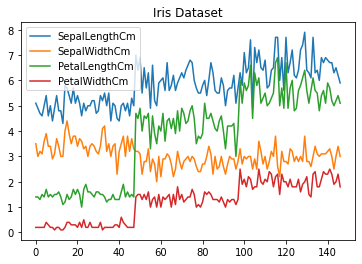

In [ ]:
columns=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
x_data=range(0,dataset.shape[0])
fig,ax=plt.subplots()
for column in columns:
  ax.plot(x_data,dataset[column],label=column)
ax.set_title('Iris Dataset')
ax.legend()

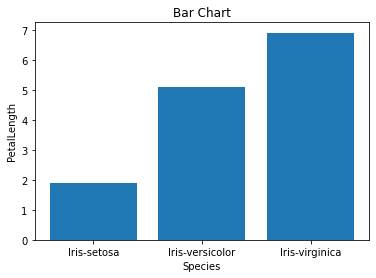

In [ ]:
plt.bar(dataset['Species'],dataset['PetalLengthCm']) 
plt.title('Bar Chart')
plt.xlabel('Species')
plt.ylabel('PetalLength') 
plt.show()

The bar chat plotted above represents the relationship between different species and the petal lenagth of a flower.

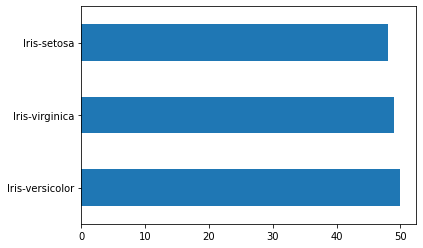

In [ ]:
dataset['Species'].value_counts().plot(kind='barh')

Here the counts of each flower species are shown in the above garph in which the flower species "Iris-versicolor" 

**LABEL ENCODING**

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset['Species']=encoder.fit_transform(dataset['Species'])
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**TRAIN TEST SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split
x=pd.DataFrame(dataset,columns=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]).values
y=dataset["Species"].values


In [ ]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [5. , 3

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

**LOGISTIC REGRESSION**

Logistic Regression is one of the model used for classification in supervised learning.

In [ ]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
model=LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9333333333333333

Accuracy of the model is 93.3%

**MODEL PREDICTION**

After training and testing the data a random data is given to predict the species of the flower.

In [ ]:
model.predict([[4.1,3.0,2.0,0.3]])

array([0])

Here 0 refers to the Iris-setosa 